<a href="https://colab.research.google.com/github/junhan-kim/Deep-Learning-Practice/blob/master/17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

2113536/2110848 [==============================] - 2s 1us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [0]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [0]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 25s 3ms/step - loss: 2.6243 - acc: 0.3440 - val_loss: 2.4224 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 24s 3ms/step - loss: 2.3330 - acc: 0.3791 - val_loss: 2.1037 - val_acc: 0.4773
Epoch 3/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.9606 - acc: 0.4962 - val_loss: 1.8161 - val_acc: 0.5361
Epoch 4/20
4400/8982 [=============>................] - ETA: 11s - loss: 1.7885 - acc: 0.5468

8982/8982 [==============================] - 24s 3ms/step - loss: 1.7395 - acc: 0.5574 - val_loss: 1.7112 - val_acc: 0.5646
Epoch 5/20
8982/8982 [==============================] - 23s 3ms/step - loss: 1.6658 - acc: 0.5740 - val_loss: 1.6692 - val_acc: 0.5801
Epoch 6/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.5992 - acc: 0.5979 - val_loss: 1.6269 - val_acc: 0.5895
Epoch 7/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.4942 - acc: 0.6222 - val_loss: 1.5364 - val_acc: 0.6135


Epoch 8/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.4192 - acc: 0.6386 - val_loss: 1.4509 - val_acc: 0.6407
Epoch 9/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.3242 - acc: 0.6620 - val_loss: 1.4022 - val_acc: 0.6536
Epoch 10/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.2673 - acc: 0.6815 - val_loss: 1.4221 - val_acc: 0.6340
Epoch 11/20
7500/8982 [========================>.....] - ETA: 3s - loss: 1.2121 - acc: 0.6912

8982/8982 [==============================] - 24s 3ms/step - loss: 1.2047 - acc: 0.6945 - val_loss: 1.3392 - val_acc: 0.6638
Epoch 12/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.1457 - acc: 0.7094 - val_loss: 1.3214 - val_acc: 0.6661
Epoch 13/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.0852 - acc: 0.7290 - val_loss: 1.2850 - val_acc: 0.6803
Epoch 14/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.0219 - acc: 0.7453 - val_loss: 1.2547 - val_acc: 0.6803
Epoch 15/20
 200/8982 [..............................] - ETA: 21s - loss: 0.9409 - acc: 0.7850

8982/8982 [==============================] - 24s 3ms/step - loss: 0.9923 - acc: 0.7530 - val_loss: 1.2382 - val_acc: 0.6946
Epoch 16/20
8982/8982 [==============================] - 24s 3ms/step - loss: 0.9364 - acc: 0.7662 - val_loss: 1.2289 - val_acc: 0.6941
Epoch 17/20
8982/8982 [==============================] - 24s 3ms/step - loss: 0.9011 - acc: 0.7751 - val_loss: 1.2127 - val_acc: 0.6897
Epoch 18/20
8200/8982 [==========================>...] - ETA: 1s - loss: 0.8524 - acc: 0.7870

8982/8982 [==============================] - 23s 3ms/step - loss: 0.8627 - acc: 0.7850 - val_loss: 1.1932 - val_acc: 0.7070
Epoch 19/20
8982/8982 [==============================] - 23s 3ms/step - loss: 0.8187 - acc: 0.7954 - val_loss: 1.2167 - val_acc: 0.6972
Epoch 20/20
8982/8982 [==============================] - 23s 3ms/step - loss: 0.7917 - acc: 0.8012 - val_loss: 1.1763 - val_acc: 0.7115


In [0]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 4s 2ms/step

 Test Accuracy: 0.7115


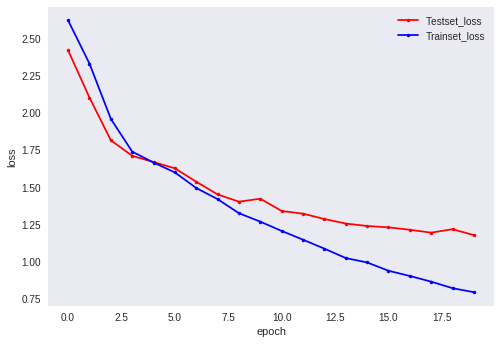

In [0]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = numpy.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()